## **Census Data Income Prediction**

### **Goal**:
- Utilize 14 out of 15 individual attributes as pedictors to predict if one's income is above or below $50K/yr based on census data
- The dataset contains 15 columns
- Number of attributes: 14
- The income is divide into two classes: >50K,<=50K


### Data:

- `age`: continuous.
- `workclass`: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- `fnlwgt`: continuous.
- `education`: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- `education-num`: continuous.
- `marital-status`: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- `occupation`: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- `relationship`: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- `race`: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- `sex`: Female, Male.
- `capital-gain`: continuous.
- `capital-loss`: continuous.
- `hours-per-week`: continuous.
- `native-country`: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- `salary`: >50K,<=50K

- "?" is used to represent missing data in this dataset.

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Read in data
adults = 'https://raw.githubusercontent.com/csbfx/advpy122-data/master/adult.csv'
df = pd.read_csv(adults, na_values=['?'])

df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Data Exploration

In [2]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


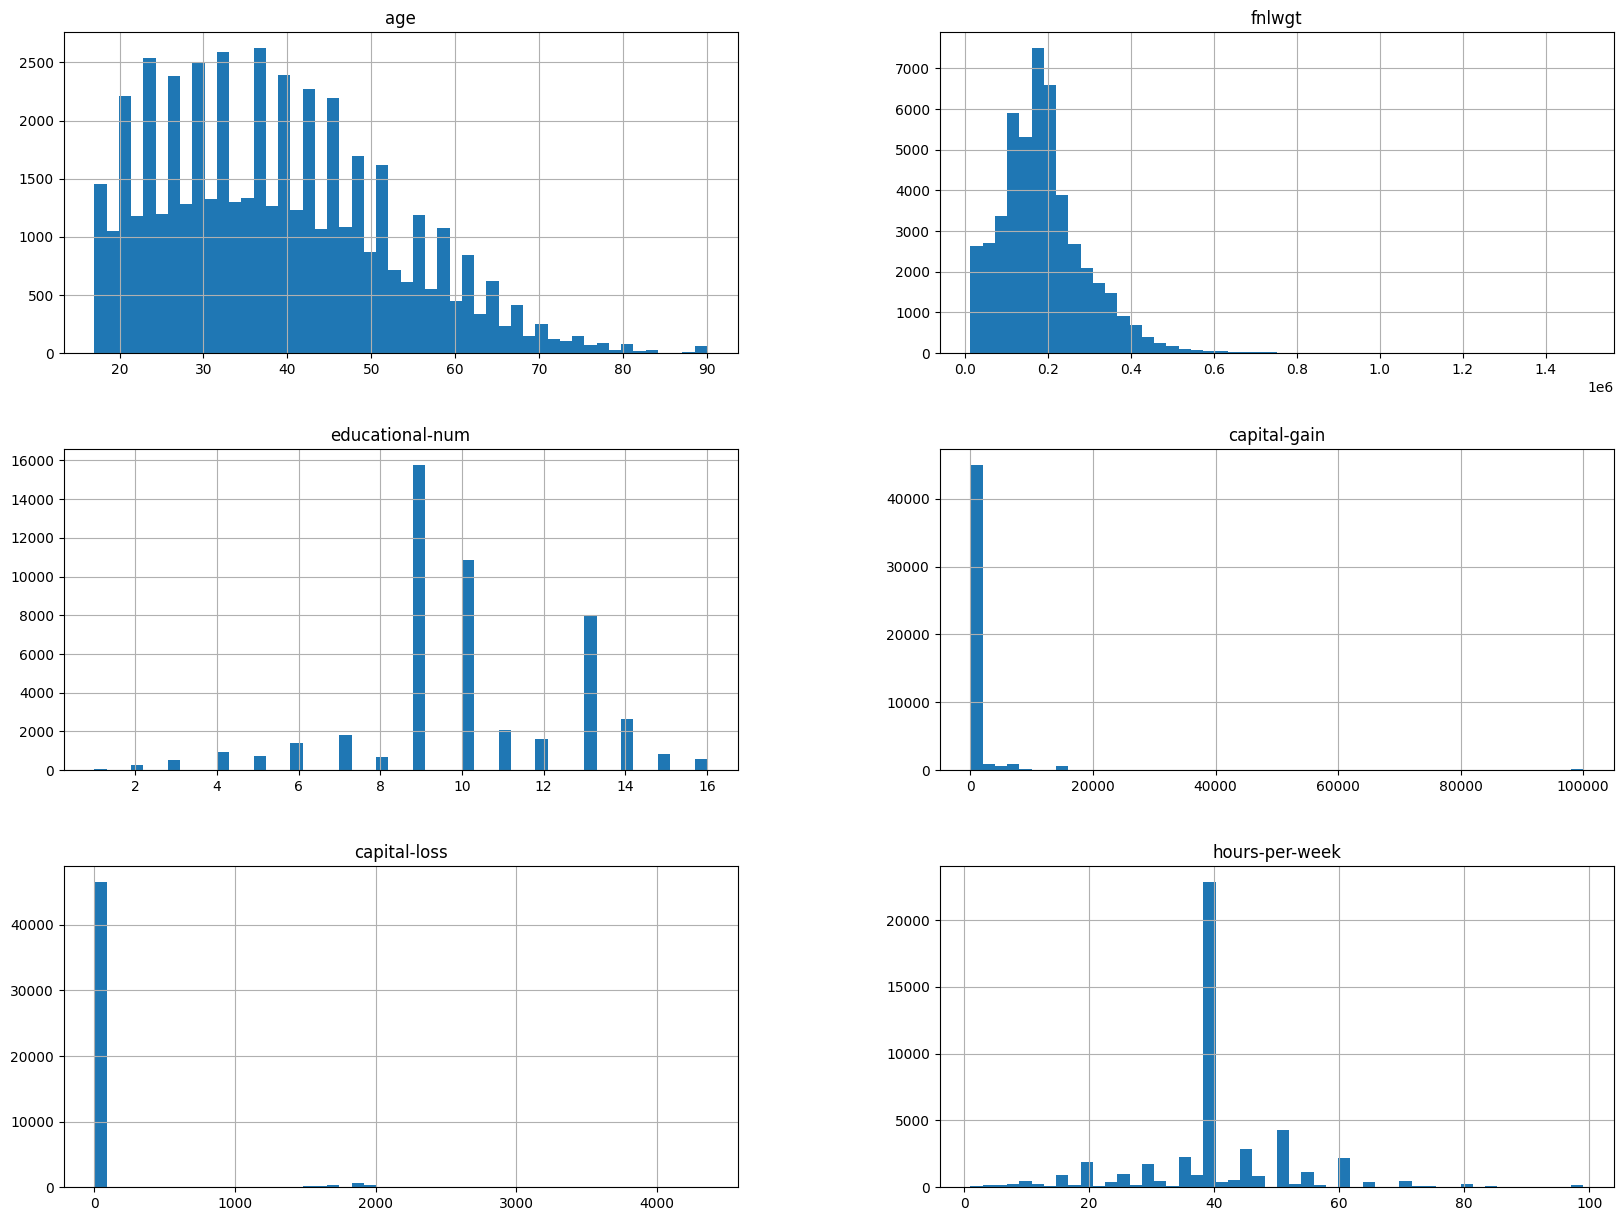

In [4]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## Prepare Training & Testing data sets

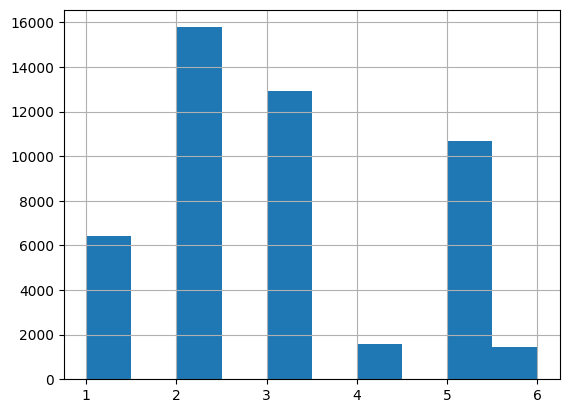

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
import numpy as np

df["education_num_cat"] = pd.cut(df["educational-num"],
                              bins=[0.0, 8.0, 9.5, 11.0, 12.5, 14.0, np.inf],
                              labels=[1, 2, 3, 4, 5, 6])

df["education_num_cat"].hist();

In [6]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["education_num_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]


In [7]:
strat_test_set["education_num_cat"].value_counts() / len(strat_test_set)

,count
education_num_cat,
2,0.323165
3,0.264920
5,0.218651
1,0.131231
4,0.032757
6,0.029276


In [8]:
def income_cat_proportions(data):
    return data["education_num_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(df),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
education_num_cat,,,,,
1,0.131199,0.131231,0.131743,0.415181,0.025067
2,0.323164,0.323165,0.324803,0.507005,0.000193
3,0.264915,0.264920,0.259597,-2.007719,0.001586
4,0.032779,0.032757,0.034292,4.615685,-0.068599
5,0.218705,0.218651,0.220698,0.911233,-0.024864
6,0.029237,0.029276,0.028867,-1.266569,0.133906


In [9]:
#Remove the education_num_cat attribute to set the data back to its original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("education_num_cat", axis=1, inplace=True)

In [10]:
df.dropna(subset=["workclass", "native-country", "occupation"], inplace = True)
df = strat_train_set.drop("income", axis=1) # drop labels for training set
income_labels = strat_train_set["income"].copy()

## Pre-processing data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39073 entries, 29888 to 35801
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39073 non-null  int64 
 1   workclass        36820 non-null  object
 2   fnlwgt           39073 non-null  int64 
 3   education        39073 non-null  object
 4   educational-num  39073 non-null  int64 
 5   marital-status   39073 non-null  object
 6   occupation       36812 non-null  object
 7   relationship     39073 non-null  object
 8   race             39073 non-null  object
 9   gender           39073 non-null  object
 10  capital-gain     39073 non-null  int64 
 11  capital-loss     39073 non-null  int64 
 12  hours-per-week   39073 non-null  int64 
 13  native-country   38391 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.5+ MB


In [12]:
#df.dropna(subset=["workclass", "native-country", "occupation"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39073 entries, 29888 to 35801
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39073 non-null  int64 
 1   workclass        36820 non-null  object
 2   fnlwgt           39073 non-null  int64 
 3   education        39073 non-null  object
 4   educational-num  39073 non-null  int64 
 5   marital-status   39073 non-null  object
 6   occupation       36812 non-null  object
 7   relationship     39073 non-null  object
 8   race             39073 non-null  object
 9   gender           39073 non-null  object
 10  capital-gain     39073 non-null  int64 
 11  capital-loss     39073 non-null  int64 
 12  hours-per-week   39073 non-null  int64 
 13  native-country   38391 non-null  object
dtypes: int64(6), object(8)
memory usage: 4.5+ MB


In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
df_num = df.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'], axis=1)
imputer.fit(df_num)
X = imputer.transform(df_num)

In [14]:
df_cat = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']]

In [15]:
from sklearn.preprocessing import OneHotEncoder
df_cat = df[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']]
# convert categorical values into one-hot vectors
cat_encoder = OneHotEncoder(sparse=False)
df_cat_1hot = cat_encoder.fit_transform(df_cat)
df_cat_1hot

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
df_cat_1hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
#df_cat_1hot.toarray()
cat_encoder.categories_

[array(['Federal-gov', 'Local-gov', 'Never-worked', 'Private',
        'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay',
        nan], dtype=object),
 array(['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th',
        'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad',
        'Masters', 'Preschool', 'Prof-school', 'Some-college'],
       dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial',
        'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct',
        'Other-service', 'Priv-house-serv', 'Prof-specialty',
        'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving',
        nan], dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Amer-Indian-Eskimo

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler())   # feature scaling
    ])

df_num_tr = num_pipeline.fit_transform(df_num)
a = pd.DataFrame(
    df_num_tr
)
a

,0,1,2,3,4,5
0,-1.359297,0.264307,-0.030182,-0.145079,-0.215981,-0.035843
1,-1.067281,-0.223667,-0.030182,-0.145079,-0.215981,1.580802
2,0.757819,-0.383311,1.135893,1.853524,-0.215981,-0.035843
3,-0.994277,-0.655378,-0.418873,-0.145079,-0.215981,-0.035843
4,-0.775265,-1.068350,-0.030182,-0.145079,-0.215981,-0.035843
...,...,...,...,...,...,...
39068,-0.556253,1.817350,-0.030182,-0.145079,-0.215981,1.580802
39069,-0.848269,-0.877111,-0.030182,-0.145079,-0.215981,-0.035843
39070,-0.191233,0.016368,-0.030182,-0.145079,-0.215981,1.257473
39071,0.830823,-1.082933,-0.418873,0.438379,-0.215981,-0.035843


In [19]:
from sklearn.compose import ColumnTransformer

num_attribs = list(df_num) # list of numerical column names
cat_attribs = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country'] # list of categorical column names
print(num_attribs)
print(cat_attribs)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_prepared = full_pipeline.fit_transform(df);

['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']


In [20]:
df_prepared
df_prepared_dense = df_prepared.toarray()

In [21]:
cols = num_attribs + cat_encoder.get_feature_names_out(cat_attribs).tolist()

prep_df = pd.DataFrame(
    df_prepared_dense,
    columns=cols,
    index=df.index
    )
prep_df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_nan
29888,-1.359297,0.264307,-0.030182,-0.145079,-0.215981,-0.035843,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
36119,-1.067281,-0.223667,-0.030182,-0.145079,-0.215981,1.580802,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23553,0.757819,-0.383311,1.135893,1.853524,-0.215981,-0.035843,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30765,-0.994277,-0.655378,-0.418873,-0.145079,-0.215981,-0.035843,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9370,-0.775265,-1.068350,-0.030182,-0.145079,-0.215981,-0.035843,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26046,-0.556253,1.817350,-0.030182,-0.145079,-0.215981,1.580802,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
45387,-0.848269,-0.877111,-0.030182,-0.145079,-0.215981,-0.035843,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
44608,-0.191233,0.016368,-0.030182,-0.145079,-0.215981,1.257473,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17480,0.830823,-1.082933,-0.418873,0.438379,-0.215981,-0.035843,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [22]:
#for s in prep_df.columns:
  #print(s)

##Select 4 different ML Models and perform 10-fold Cross Validation.
- Pick the best mode1 and perform fine-tuning.
- Test ML model with the test set.

Try four different ML models for classification: DecisionTreeClassifier, RandomForestClassifier, SGDClassifier, ExtraTreeClassifier

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [25]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_class = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree_class, df_prepared, income_labels,
                        scoring="accuracy", cv=10)
display_scores(tree_scores)

Scores: [0.81141249 0.80655067 0.81576254 0.81469158 0.81187612 0.83158434
 0.8208344  0.81750704 0.81392373 0.80854876]
Mean: 0.8152691649426442
Standard deviation: 0.006723947950146707


In [26]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_class = RandomForestClassifier(n_estimators=10, random_state=42)
forest_scores = cross_val_score(forest_class, df_prepared, income_labels,
                                scoring="accuracy", cv=10)
display_scores(forest_scores)

Scores: [0.85414534 0.84288639 0.84672467 0.84028666 0.84975685 0.84514973
 0.84770924 0.83926286 0.84668544 0.84003071]
Mean: 0.8452637891887091
Standard deviation: 0.004505974482983605


In [27]:
#SGDClassifier
from sklearn.linear_model import SGDClassifier
SGD_class = SGDClassifier(random_state = 42)
SGD_scores = cross_val_score(SGD_class, df_prepared, income_labels,
                                scoring="accuracy", cv=10)
display_scores(SGD_scores)

Scores: [0.84774821 0.84672467 0.8462129  0.8515485  0.85692347 0.84668544
 0.84745329 0.85513181 0.85385206 0.84566163]
Mean: 0.8497941979582091
Standard deviation: 0.003968836991445536


In [28]:
#ExtraTreeClassifier
from sklearn.tree import ExtraTreeClassifier
tree_class = ExtraTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree_class, df_prepared, income_labels,
                        scoring="accuracy", cv=10)
display_scores(tree_scores)

Scores: [0.80706244 0.80117707 0.79401228 0.79626312 0.79498336 0.79600717
 0.80163809 0.79959048 0.79882263 0.79523931]
Mean: 0.7984795942720451
Standard deviation: 0.003820666878115461


## Pick the best model and perform fine-tuning
- We determined that the **SGDClassifier** gives us the best result as it has the highest mean value and second lowest standard deviation based on 'accuracy' scoring

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = [
        {'alpha': [0.01, 0.001, 0.0001, 0.00001],
         'penalty': ['l1', 'l2', 'elasticnet'],
         'loss': ['hinge','modified_huber', 'perceptron']
         }
  ]

SGD_class = SGDClassifier(random_state = 42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training
grid_search = GridSearchCV(SGD_class, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(df_prepared, income_labels)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid=[{'alpha': [0.01, 0.001, 0.0001, 1e-05],
                          'loss': ['hinge', 'modified_huber', 'perceptron'],
                          'penalty': ['l1', 'l2', 'elasticnet']}],
             return_train_score=True, scoring='accuracy')

In [30]:
grid_search.best_params_

{'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l1'}

In [31]:
grid_search.best_estimator_

SGDClassifier(alpha=0.001, loss='modified_huber', penalty='l1', random_state=42)

In [32]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print((mean_score), params)

0.8376885787129126 {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l1'}
0.8485654388394537 {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'l2'}
0.8479768108195651 {'alpha': 0.01, 'loss': 'hinge', 'penalty': 'elasticnet'}
0.8482839485733645 {'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'l1'}
0.8518669690915186 {'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'l2'}
0.8518414526087256 {'alpha': 0.01, 'loss': 'modified_huber', 'penalty': 'elasticnet'}
0.7984270370568697 {'alpha': 0.01, 'loss': 'perceptron', 'penalty': 'l1'}
0.8093829062491146 {'alpha': 0.01, 'loss': 'perceptron', 'penalty': 'l2'}
0.8159088867349498 {'alpha': 0.01, 'loss': 'perceptron', 'penalty': 'elasticnet'}
0.8505873097829069 {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l1'}
0.8508944442615833 {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
0.8506641343416126 {'alpha': 0.001, 'loss': 'hinge', 'penalty': 'elasticnet'}
0.8520205330557339 {'alpha': 0.001, 'loss': 'modified_huber', 'penalty': 'l1'}
0.85117594435304

## Test ML model with the test set
- Evaluate fine-tuned model performance using the test set.

In [33]:
final_model = grid_search.best_estimator_
from sklearn.metrics import accuracy_score
# final_model
X_test = strat_test_set.drop("income", axis=1)
y_test = strat_test_set["income"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_acc = accuracy_score(y_test, final_predictions)
final_acc

0.8473743474255298

### Evaluating the model using the Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, final_predictions)
print("Confusion Matrix:")
print(confusion_mat)


Confusion Matrix:
[[6928  510]
 [ 981 1350]]


##  Evaluating the model using Precision-Recall Curve


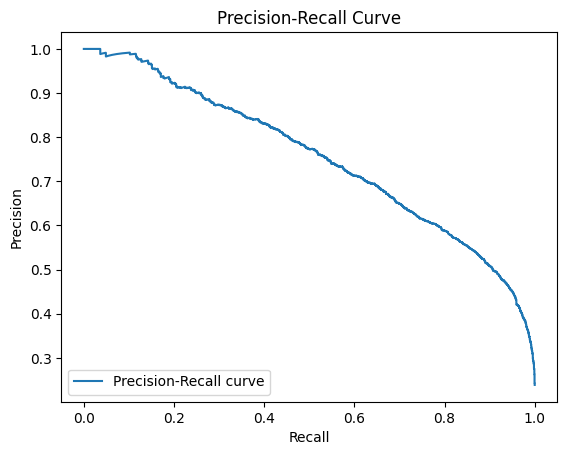

Average Precision: 0.7535971788112872


In [52]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

y_test_numeric = np.where(y_test == '>50K', 1, 0)  # Convert labels to numeric (0 / 1)
precision, recall, thresholds = precision_recall_curve(y_test_numeric, final_model.decision_function(X_test_prepared))
average_precision = average_precision_score(y_test_numeric, final_model.decision_function(X_test_prepared))

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

print(f"Average Precision: {average_precision}")
